In [154]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import os

In [155]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

#Acá paso los datos a una lista de strings y recorro todos
L=['4','16','32','64','128'];


prob_total =[]; #esto sería una lista de listas donde cada elemento es el archivo
fz_perc_total =[];
percola_tot=[];
ns_total = [];

for j,l in enumerate(L):
    #with open (myFolder+'/datos_ejercicios/Tablas_L='+l+'_refinado.txt', 'r') as myfile: 
    with open (myFolder+'/datos_ejercicios/Tablas_L='+l+'_refinado.txt', 'r') as myfile: 
 
        probabilidad_L = [];
        fz_percolante_L =[];
        percola_L = [];
        ns_L = [];
        for myline in myfile: # For each line, stored as myline,
            datos = [i for i in myline.split(' ') if i.strip()];
            largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos
    
            if largo > 1: #esto lo hice para evitar las filas de los 'x00'
                probabilidad_L.append(float(datos[0]));


                percola_L.append(float(datos[1]));
                ns_L.append([float (i) for i in datos[2:]]);                 
    prob_total.append(probabilidad_L)
    fz_perc_total.append(fz_percolante_L);
    percola_tot.append(percola_L);
    ns_total.append(ns_L);
    myfile.close()

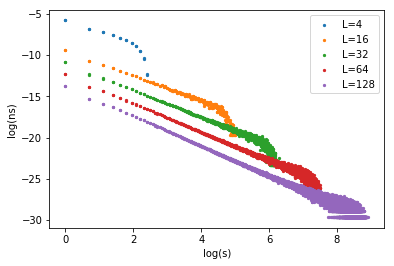

In [156]:
#Ajuste de ln(ns) vs ln(s)
name2='lognsvslogs'
logns_tot=[]
logs_tot=[]

pc_L3=[]
for k,l in enumerate(L):
    logns_L=[]
    logs_L=[]
    for i in range(1,len(ns_total[k])):
        ns=[r/(int(l)**2) for r in ns_total[k][i]]
        chi=0
        
        #busco un entorno donde los p ~ pc
        
        if abs(prob_total[k][i]-0.593)<=0.001:
            for j in range(1,len(ns)):
                if(ns[j]>0):
                    logns_L.append(np.log(abs(float(ns[j]/(int(l)**2)))));
                    logs_L.append(np.log(abs(float(j))));

    logns_tot.append(logns_L);
    logs_tot.append(logs_L);

    
fig=plt.figure()
ax = plt.subplot(111)
for k,l in enumerate(L):
    y=np.asarray(logns_tot[k]);
    x=np.asarray(logs_tot[k]);
    plt.scatter(x, y,s=5,label="L="+l) # ploteo la data y el ajuste

plt.legend(loc=1)
plt.xlabel('log(s)')
plt.ylabel('log(ns)')
#plt.savefig(name+'_grafico.png')
plt.show()


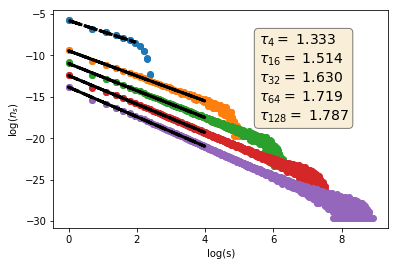

In [157]:
#voy a ajustar ahora hasta log(s)=2
name='ajuste_logns'
from scipy import optimize
from scipy.special import zeta, polygamma, factorial

taus=[]
fig=plt.figure()
ax = plt.subplot(111)
for k,l in enumerate(L):
    y=[]
    x=[]
    y_tot=np.asarray(logns_tot[k]);
    x_tot=np.asarray(logs_tot[k]);
    i=0;
    
    if l=='4':
        for i in range(0, len(logs_tot[k])):
            if logs_tot[k][i]>=0 and logs_tot[k][i]<2 : #para 4 que vaya a 2
                y.append(float(logns_tot[k][i]));
                x.append(float(logs_tot[k][i]));
    else:
        for i in range(0, len(logs_tot[k])):
            if logs_tot[k][i]>=0 and logs_tot[k][i]<4: #para el resto a 5
                y.append(float(logns_tot[k][i]));
                x.append(float(logs_tot[k][i]));
        
    y=np.asarray(y);
    x=np.asarray(x);
    fitfunc = lambda p, x: p[0]*x+p[1]# Funcion con la que queremos fitear la data
    p0 = [2.0, -14];  # Parametros iniciales para fitear
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
    p1, success = optimize.leastsq(errfunc, p0[:], args=(x, y))
    #p1 es [pendiente, origen]
    taus.append(-round(p1[0],3));
    plt.plot(x_tot, y_tot,'o', x, fitfunc(p1, x), "k--",linewidth=3) # ploteo la data y el ajuste
    

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.6, 0.5, r'$\tau_{4} =$ %0.3f' %(taus[0])
         +'\n'+r'$\tau_{16} =$ %0.3f' %(taus[1]) 
         +'\n'+r'$\tau_{32} =$ %0.3f' %(taus[2])
         +'\n'+r'$\tau_{64} =$ %0.3f' %(taus[3])
        +'\n'+r'$\tau_{128} =$ %0.3f' %(taus[4]), transform=ax.transAxes, fontsize=14, bbox=props)

plt.xlabel('log(s)')
plt.ylabel('log($n_{s}$)') 
plt.savefig(name+'_grafico.png')
plt.show()


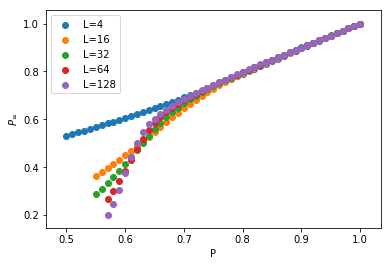

In [158]:
#Calculemos ahora el p_inf
prob_Total=[]
M_Total=[]
logL=[]
logM=[]
pc_L2=[]
arg_p=[]
error=[]
for i,l in enumerate(L):
    k=0
    while percola_tot[i][k]<0.5:
        k+=1
    pc=(prob_total[i][k-1]+prob_total[i][k])/2
    
    arg_p.append(k)
    error=((prob_total[i][k+1]-prob_total[i][k-1])/2)
    pc_L2.append([l,round(pc,3),round(error,3)])
    
    with open (myFolder+'/datos_ej2y3/Ej2y3_L='+l+'.txt', 'r') as myfile: 
        proba_L = [];
        fz_percolante_L =[];
        percola_L = [];
        for myline in myfile: # Calcula los datos del Ej2y3.txt,
            datos = [i for i in myline.split(' ') if i.strip()];
            proba_L.append(float(datos[0]));    
            fz_percolante_L.append(float(datos[1]));    
        prob_Total.append(proba_L);
        M_Total.append(fz_percolante_L);
        pc=round(pc_L2[i][1],2); #Usamos el metodo 2
        
        arg=proba_L.index(pc); #indice de la pc
        M=fz_percolante_L[arg];

        logL.append(np.log(float(l)));
        logM.append(np.log(M));
    
    
    p=prob_Total[i]
    pinf=[x/(int(l)**2) for x in M_Total[i]]
    plt.scatter(p,pinf)
    plt.xlabel('P')
    plt.ylabel('$P_\infty$') 
    
plt.legend(['L='+l for l in L])

plt.show()

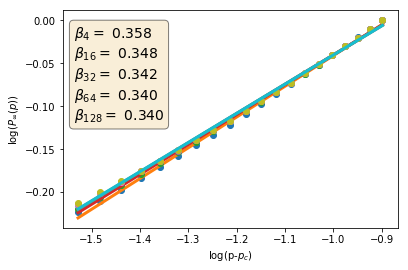

In [159]:
#Vamos a ajustarlos para tener las pendientes.
betas=[]
fig=plt.figure()
ax = plt.subplot(111)
for k,l in enumerate(L):
    y=[]
    x=[]
    y_tot=np.asarray([x/(int(l)**2) for x in M_Total[k]]);
    x_tot=np.asarray(prob_Total[k]);
    i=0;
    
    for i in range(0, len(prob_Total[k])):
        if 0.8<prob_Total[k][i]: #para el resto a 5
            y.append(np.log(abs(float(y_tot[i]))));
            x.append(np.log(abs(float(x_tot[i])-float(0.593))));


    y=np.asarray(y);
    x=np.asarray(x);
    fitfunc = lambda p, x: p[0]*x+p[1]# Funcion con la que queremos fitear la data
    p0 = [2.0, -1];  # Parametros iniciales para fitear
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
    p1, success = optimize.leastsq(errfunc, p0[:], args=(x, y))
    #p1 es [pendiente, origen]
    betas.append(round(p1[0],3));
    plt.plot(x, y,'o', x, fitfunc(p1, x),linewidth=3) # ploteo la data y el ajuste
    

# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.15, 0.5, r'$\beta_{4} =$ %0.3f' %(betas[0])
         +'\n'+r'$\beta_{16} =$ %0.3f' %(betas[1]) 
         +'\n'+r'$\beta_{32} =$ %0.3f' %(betas[2])
         +'\n'+r'$\beta_{64} =$ %0.3f' %(betas[3])
        +'\n'+r'$\beta_{128} =$ %0.3f' %(betas[4]), transform=ax.transAxes, fontsize=14, bbox=props)

plt.xlabel('log(p-$p_{c}$)')
plt.ylabel('log($P_{\infty}(p)$)') 
plt.savefig(name+'_grafico.png')
plt.show()


In [160]:
#Vuelvo a calcular los Tau
#taus2 = (2d - beta/nu)/D
taus2=[]
for i,l in enumerate(L):
    taus2.append(round(((4-betas[i]/1.172)/1.87),3))

print('Los taus calculados antes eran:', taus)
print('Los taus calculados ahora son:', taus2)

Los taus calculados antes eran: [1.333, 1.514, 1.63, 1.719, 1.787]
Los taus calculados ahora son: [1.976, 1.98, 1.983, 1.984, 1.984]


Los pc correspondientes son: [0.101, 0.101, 0.401, 0.401, 0.401]


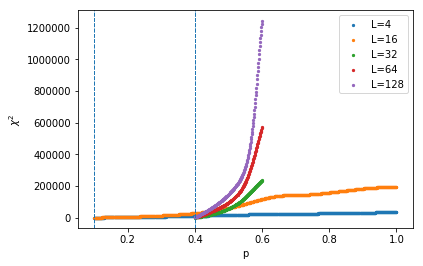

In [161]:
import scipy
from scipy.special import zetac
#fitfunc = lambda p, x: p[0]/scipy.special.zeta(p[1]-1) *x**(-p[1]) 
#errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pc_L3=[]
name='chi2'
#ya grafique log(ns) vs log(s), lo que tengo que hacer ahora es: 
resultados=[]
chi_total=[]
P_tot=[]
pcs=[]
for k,l in enumerate(L):
    t =taus2[k]
    chi=0
    chi_L=[]
    P_L=[]
    for i in range(1,len(ns_total[k])):
        logns=[np.log(r/(int(l)**2)) for j,r in enumerate(ns_total[k][i]) if r>0 and j>0]
        logs=[np.log(j) for j,r in enumerate(ns_total[k][i])if r>0 and j>0]        
        p=prob_total[k][i] 
        for j in range(1,len(logns)):
            res=(logns[j]-(-t*logs[j]+np.log(abs(p/(zetac(t-1)+1)))))**2
            chi+=res
        P_L.append(p)
        chi_L.append(chi)
        
    chi_total.append(chi_L)
    P_tot.append(P_L)
      
###grafico    
fig=plt.figure()
#ax1 = plt.subplot(332)
#ax2 = plt.subplot(111)

for k,l in enumerate(L):
    #busco los minimos para cada chi_L
    pos=np.argmin(chi_total[k]) #pos que min chi^2
    #busco el pc correspondiente y lo agrego a una lista
    pcs.append(P_tot[k][pos])
    
    plt.scatter(P_tot[k],chi_total[k],s=5,label="L="+l)

print('Los pc correspondientes son:', pcs)

plt.xlabel('p')
plt.ylabel('$\chi^{2}$')
plt.legend(['L='+l for l in L])

plt.axvline(pcs[0], linestyle='--',linewidth=1) #Para L=4
plt.axvline(pcs[1], linestyle='--',linewidth=1) #Para L=16
plt.axvline(pcs[2], linestyle='--',linewidth=1) #Para L=32
plt.axvline(pcs[3], linestyle='--',linewidth=1) #Para L=64
plt.axvline(pcs[4], linestyle='--',linewidth=1) #Para L=128


#plt.savefig(name+'_grafico.png')
plt.show()

In [ ]:
#Ejemplo de un chi, para L=128
name='chi2'
fig=plt.figure()
ax1 = plt.subplot(332)
ax2 = plt.subplot(111)

for j in range(0,len(Resultados)):
    plt.scatter(Resultados[j][0],Resultados[j][3])
    
pos=np.argmin([i[3] for i in Resultados]) #pos que min chi^2
p_c=Resultados[np.argmin([i[3] for i in Resultados])][0]
tau=-Resultados[pos][1] #tau correspondiente al min
chi=Resultados[pos][3] #chi correspondiente al min
plt.xlabel('p')
plt.ylabel('$\chi^{2}$')
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='beige', alpha=0.5)


# place a text box in upper left in axes coords
fig.text(0.3, 0.3, r'${\tau} =$ %0.3f' %round(tau,3), transform=ax1.transAxes, fontsize=14,
       position=(-0.6,0.), bbox=props1)

# place a text box in upper left in axes coords
fig.text(0.3, 0.3, 'p$_{{c}}$ = %f \n$\chi^{2}$ = %f' %(p_c, round(chi,3)), transform=ax2.transAxes, fontsize=14,
        position=(0.05,0.4), bbox=props2)

plt.axvline(p_c, linestyle='--',linewidth=1) 

#plt.title(name)
plt.savefig(name+'_grafico.png')
plt.show()